# Creating Pipeline 

In [1]:
# importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading data

df_heart = pd.read_csv('/home/karush/code/karushp/practice/heart-disease/data/heart-disease.csv')


In [3]:
# Identifying missing values
df_heart.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# describing the data

df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# Determine the Categorical features based on the number of unique values

cat_features = [col for col in df_heart.columns if df_heart[col].nunique() < 5]
num_features = [col for col in df_heart.columns if df_heart[col].nunique() >= 5]

print('Categorical features:', cat_features)
print('Numerical Features:', num_features)


Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']
Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


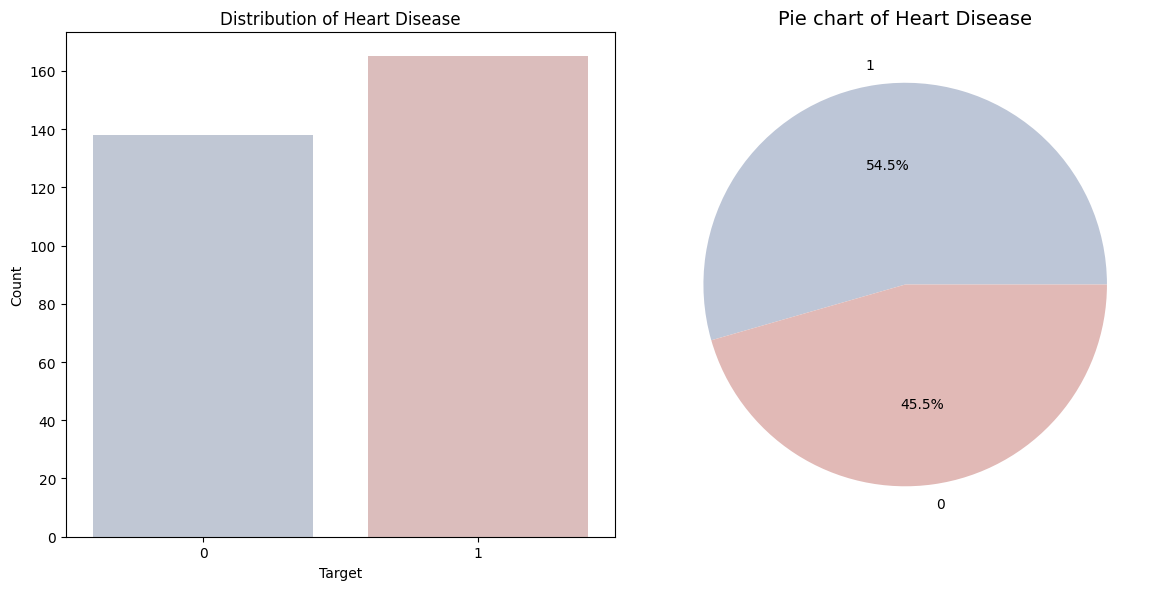

In [6]:
# Ploting the distribution of the target

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
palette = sns.color_palette('vlag',2)

sns.countplot(data=df_heart, x='target', palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Heart Disease')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')

df_heart['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=palette)
axes[1].set_title('Pie chart of Heart Disease', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [7]:
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

In [8]:
df_heart[cat_features].columns


Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], dtype='object')

In [9]:
def plot_categorical_features(df_heart, cat_features):
    """
    Plots barplots and pie charts for categorical features in the dataframe.

    Parameters:
    df_heart (DataFrame): The dataframe containing the categorical features and the target variable.
    cat_features (list): List of categorical feature names to be plotted.

    Returns:
    None
    """
    n_cat_features = len(cat_features)
    countplot_palette = sns.color_palette('vlag', n_cat_features)
    fig, axes = plt.subplots(n_cat_features, 2, figsize=(15, 5 * n_cat_features))

    for i, features in enumerate(cat_features):
        # Determine the number of unique values
        n_unique_values = df_heart[features].nunique()

        # Determine the palette based on the number of unique values
        palette = sns.color_palette('vlag', n_unique_values)

        # Barplot on the left
        sns.countplot(data=df_heart, x=features, palette=palette, ax=axes[i, 0], hue='target')
        axes[i, 0].set_title(f'Barplot of {features}', fontsize=12)
        axes[i, 0].set_xlabel(features, fontsize=12)
        axes[i, 0].set_ylabel('Count', fontsize=12)
        axes[i, 0].legend(title='Heart Disease', title_fontsize=12)

        # Pie chart on the right
        df_heart[features].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i, 1], colors=palette)
        axes[i, 1].set_title(f'Pie chart of {features}', fontsize=12)
        axes[i, 1].set_ylabel('')

    plt.tight_layout()
    plt.show()


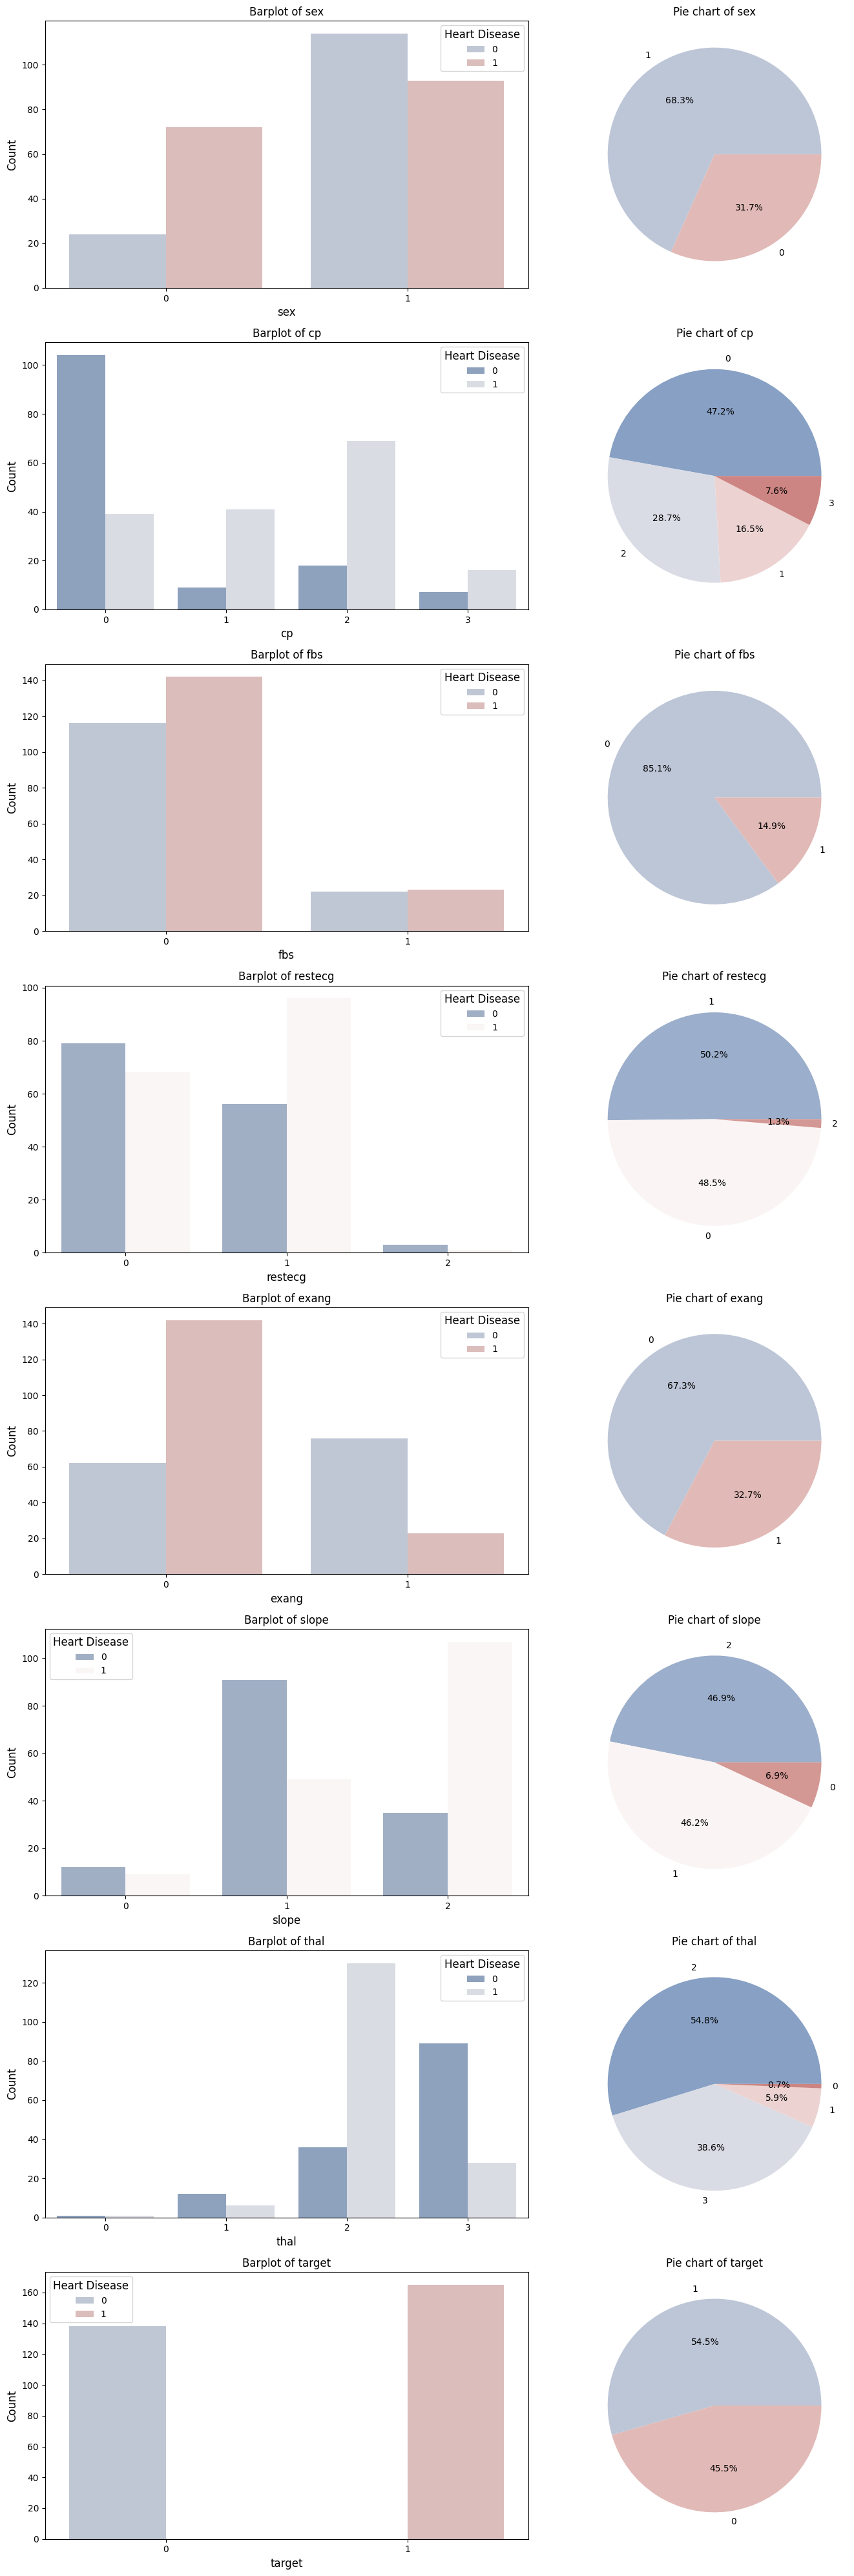

In [10]:
# Plotting Categorical Features

n_cat_features = len(cat_features)
countplot_palette = sns.color_palette('vlag', n_cat_features)
fig,axes = plt.subplots(n_cat_features, 2, figsize=(15, 5*n_cat_features))

for i, features in enumerate(cat_features):

    # Determine the number of unique values
    n_unique_values = df_heart[features].nunique()

    # Determine the palette based on the number of unique values
    palette = sns.color_palette('vlag',n_unique_values)

    #Barplot on the left
    sns.countplot(data=df_heart, x=features, palette=palette, ax=axes[i,0], hue='target')
    axes[i,0].set_title(f'Barplot of {features}', fontsize=12)
    axes[i,0].set_xlabel(features, fontsize=12)
    axes[i,0].set_ylabel('Count', fontsize=12)
    axes[i,0].legend(title='Heart Disease', title_fontsize=12)

    # Piechart on the right
    df_heart[features].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i,1], colors=palette)
    axes[i,1].set_title(f'Pie chart of {features}', fontsize=12)
    axes[i,1].set_ylabel('')

plt.tight_layout()
plt.show()

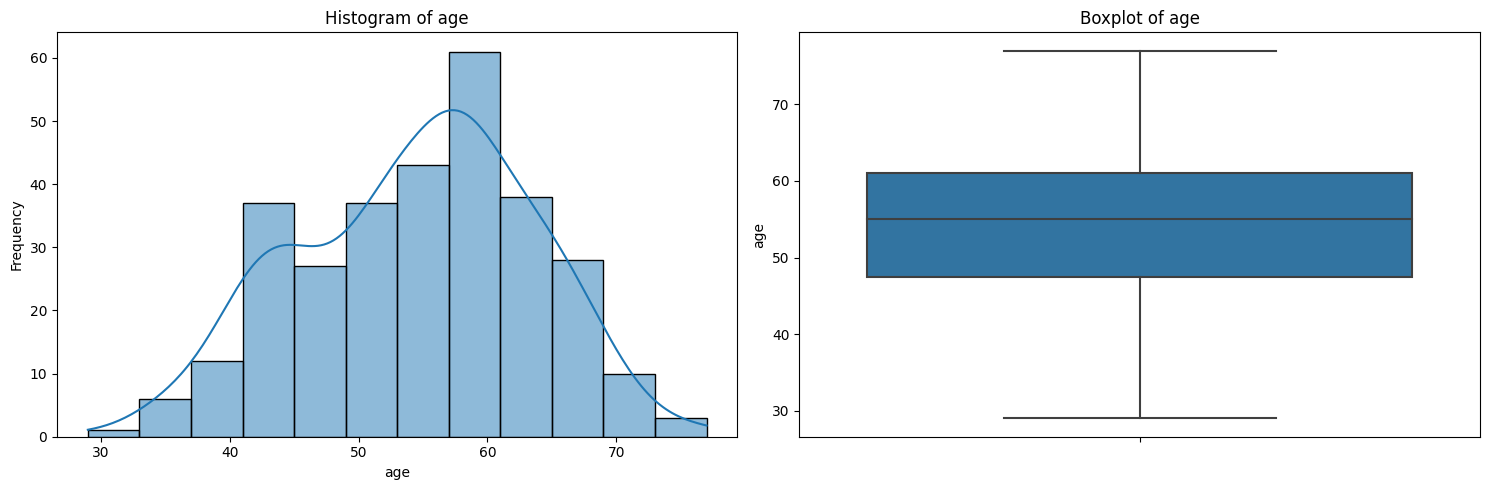

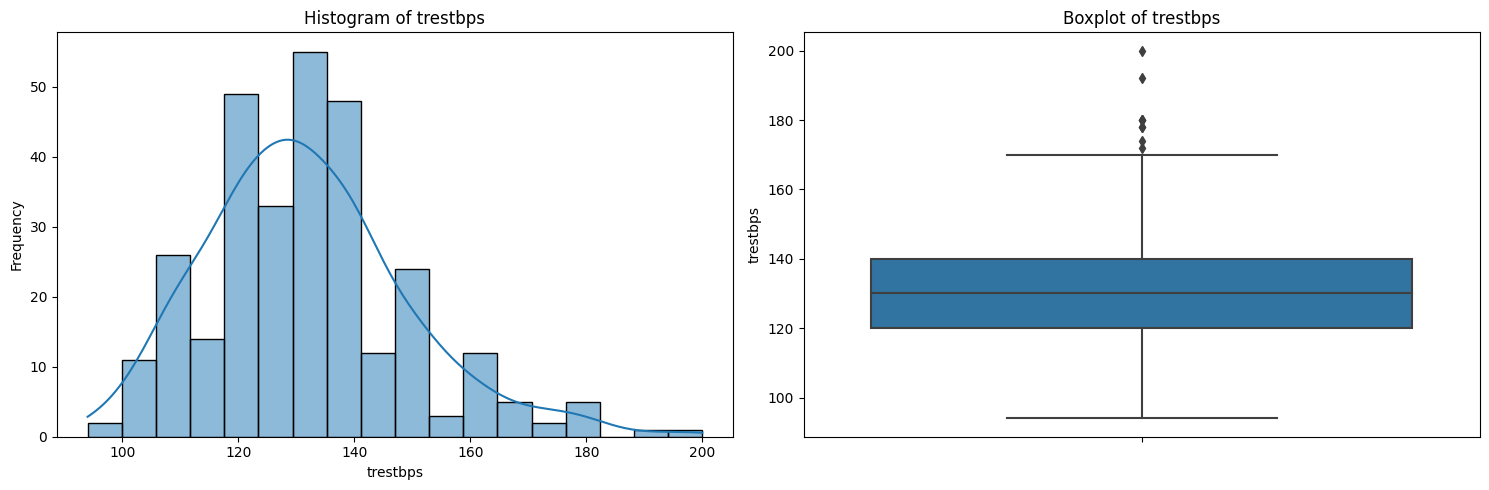

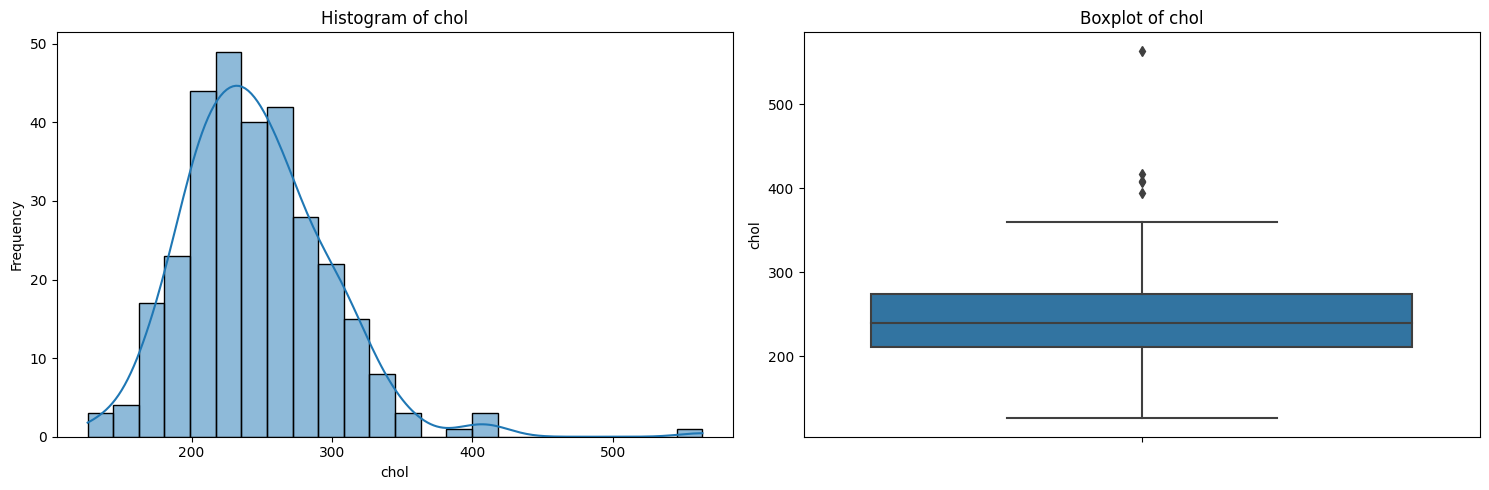

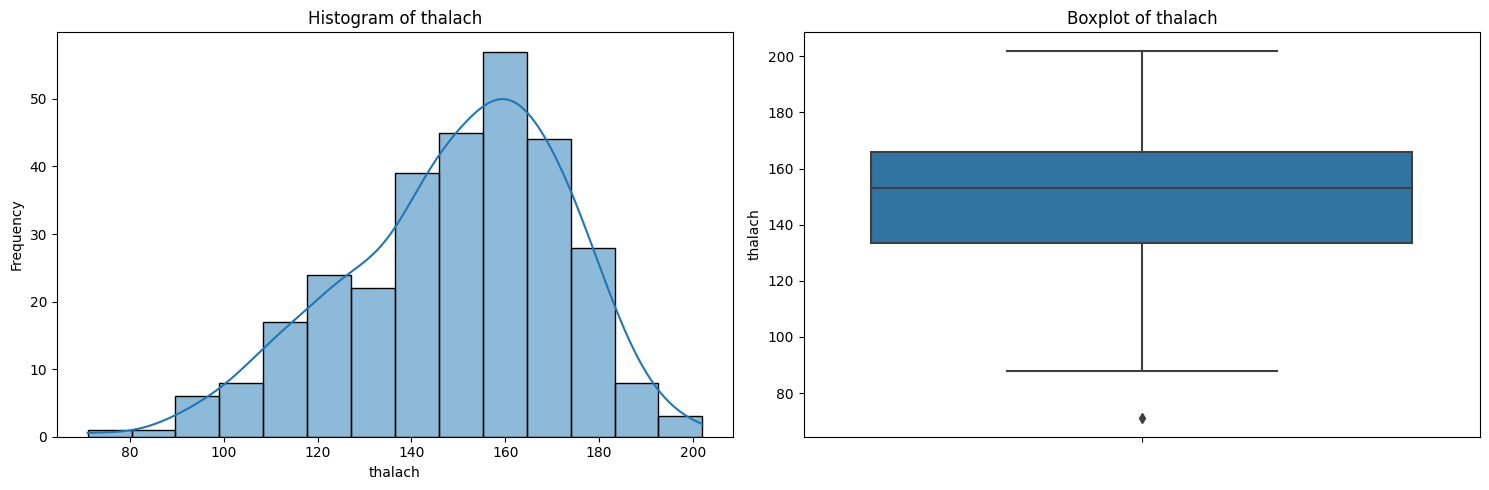

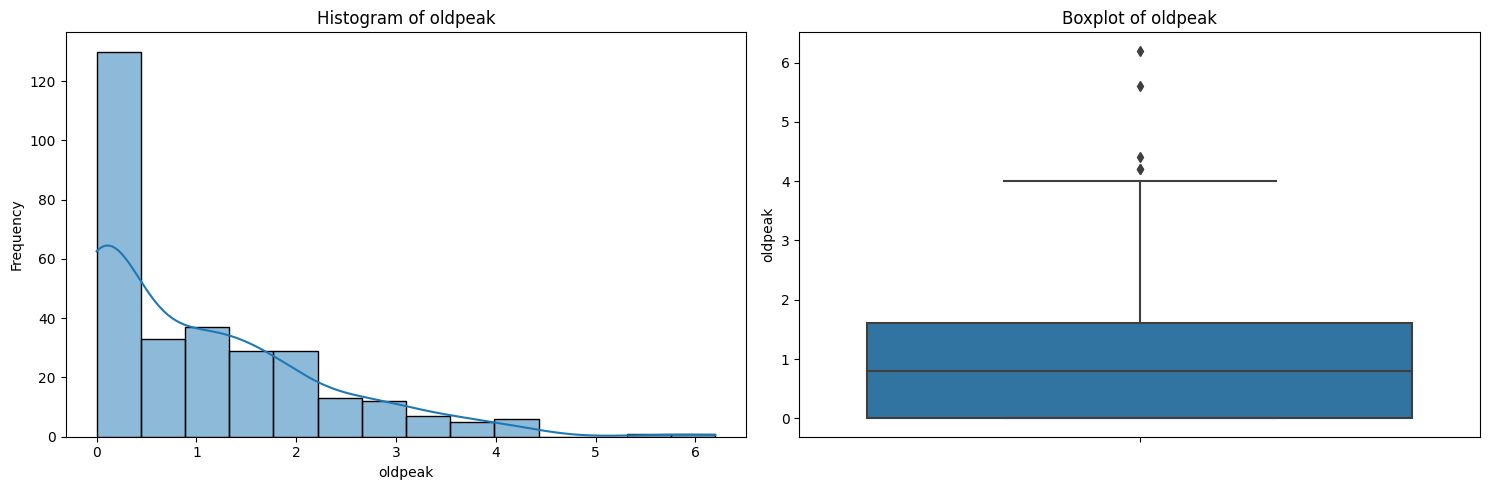

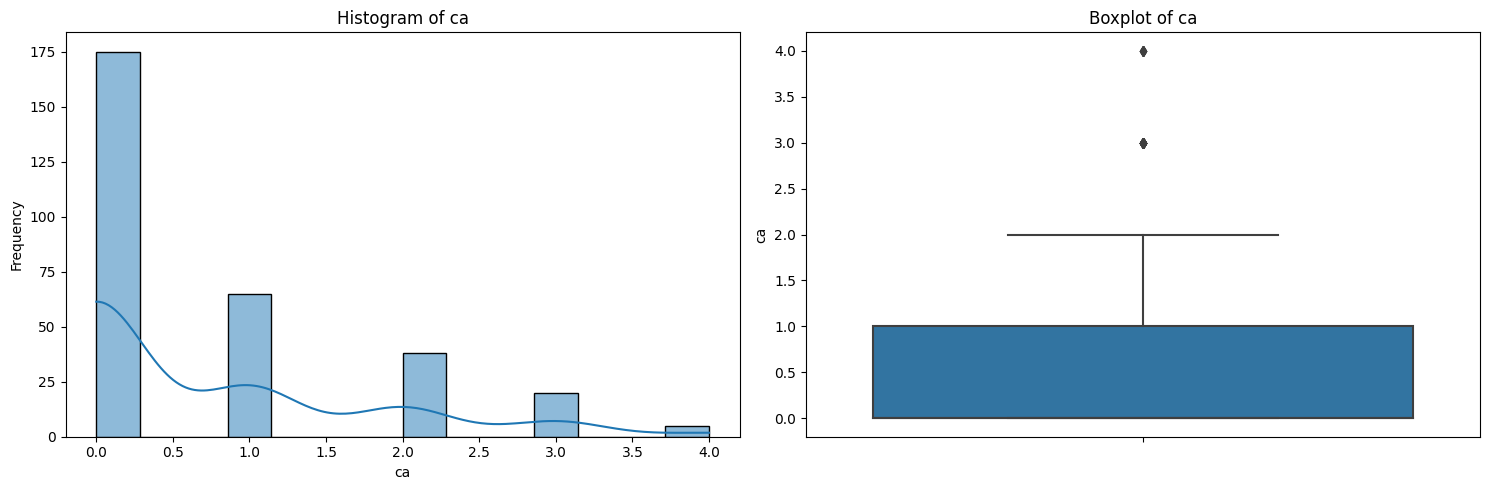

In [11]:
# Plotting Numerical Features

def plot_hist_and_box(df:'pd.DataFrame', column:str):

    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Histogram plot on the left
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Box plot on the right
    sns.boxplot(y=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_ylabel(column)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

for x in num_features:
    plot_hist_and_box(df_heart,x)


In [12]:
# Creating Correlation Matrix

corr_matrix = df_heart.corr()
filterd_corr_matrix = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.1)]

# Get key features for target result (|corr| > 0.1 |corr| < -0.1)
corr_with_target = corr_matrix['target'].reset_index().sort_values(by='target', ascending=False)
corr_with_target.columns=['Features', 'Correlation']
filtered_corr_with_target = corr_with_target[(corr_with_target['Correlation'] > 0.03) | (corr_with_target['Correlation'] < -0.03)]
filtered_corr_with_target = filtered_corr_with_target[filtered_corr_with_target['Features'] != 'target']

filtered_corr_with_target

,Features,Correlation
2,cp,0.433798
7,thalach,0.421741
10,slope,0.345877
6,restecg,0.137230
4,chol,-0.085239
3,trestbps,-0.144931
0,age,-0.225439
1,sex,-0.280937
12,thal,-0.344029
11,ca,-0.391724


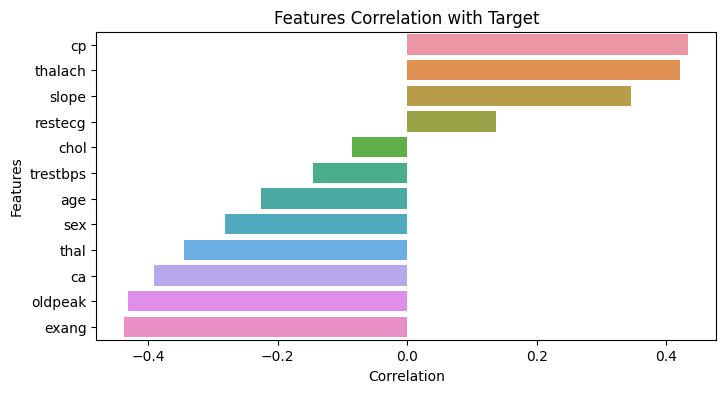

In [13]:
# Plotting Correlation Matrix

plt.figure(figsize=(8, 4))
sns.barplot(x='Correlation', y='Features', data=filtered_corr_with_target)
plt.title('Features Correlation with Target')
plt.show()

In [14]:
# Defining feature and target
X = df_heart.drop(columns='target')
y = df_heart['target']

In [15]:
# Identifing target distribution
y.value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

## Target values are balanced, models considered are RandomForestClassifier and LogisticRegression.

In [16]:
# Importing libraries preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)


In [18]:
print('Numerical Features:', num_features)
print('Categorical Features:', cat_features)

Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']


In [19]:
# Define preprocessing for numerical features
# Not needed for categorical features as they are already encoded

# Define preprocessing for numerical features
num_transformer = MinMaxScaler()

# Define ColumnTransformer to preprocess numerical features
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features)
])

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

model_names = []
scoring = []

# Train and evaluate each model using the validation set
for name, clf in classification_models.items():
    pipeline = make_pipeline(preprocessor, clf)
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)  # Using f1
    model_names.append(name)
    scoring.append(score)
    print(f"{name} accuracy: {score:.2f}")

Logistic Regression accuracy: 0.75
K-Nearest Neighbors accuracy: 0.75
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.64
Random Forest accuracy: 0.74
Gradient Boosting accuracy: 0.67
AdaBoost accuracy: 0.62
Gaussian Naive Bayes accuracy: 0.70
XGBoost accuracy: 0.70


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with the preprocessor and the Gradient Boosting model
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=1))
])

# Define the parameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.02, 0.03, 0.07, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 5, 7,8],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='precision'  # Change scoring to accuracy for classification
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
val_score = best_model.score(X_test, y_test)
print("Accuracy on validation set:", val_score)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, cl

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.69      0.77      0.73        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



<Axes: xlabel='feature', ylabel='importance'>

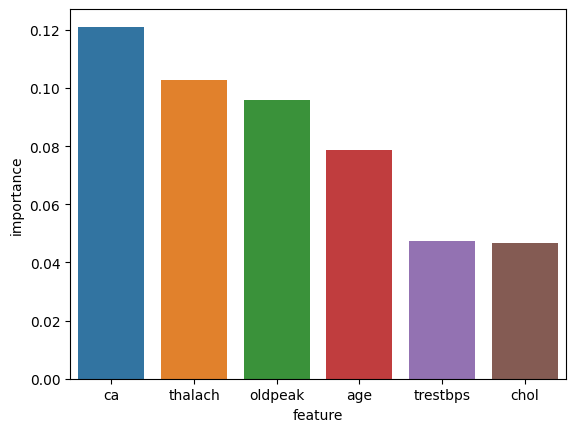

In [22]:
# finding permutation importance

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

perm_importance = permutation_importance(best_model, X_train, y_train,n_repeats=10)

# Unstack results showing the decrease in performance after shuffling each feature
importance_df = pd.DataFrame(np.vstack((X_train.columns, perm_importance.importances_mean)).T)

importance_df.columns = ['feature', 'importance']

importance_df.sort_values(by='importance', ascending=False, inplace=True)

sns.barplot(y='importance', x='feature', data=importance_df[importance_df['importance'] > 0])

### Reducing fetaures to 5

In [37]:
# Redefining X and y
X_refine = df_heart[['ca','thalach','oldpeak','age','chol','trestbps']]
y_refine = df_heart['target']

# Defining train and test set
X_train, X_test, y_train, y_test = train_test_split(X_refine, y_refine, test_size=0.2, random_state=1)

# Definifing numerical and categorical features
num_features_refine = [col for col in X_refine.columns if X_refine[col].nunique() >= 5]
cat_features_refine = [col for col in X_refine.columns if X_refine[col].nunique() < 5]

# Defining numerical and categorical transformers
if num_features_refine:
    num_transformer = MinMaxScaler()

    # Defining column transformer to preprocess numerical features
    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features_refine)
    ], remainder='passthrough')  # Passthrough ensures all columns are used
else:
    preprocessor = 'passthrough'  # If no numerical features, just pass through the data


classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

model_names = []
scoring = []

# Train and evaluate each model using the validation set
for name, clf in classification_models.items():
    pipeline = make_pipeline(preprocessor, clf)
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    model_names.append(name)
    scoring.append(score)
    print(f"{name} accuracy: {score:.2f}")


Logistic Regression accuracy: 0.75
K-Nearest Neighbors accuracy: 0.75
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.66
Random Forest accuracy: 0.79
Gradient Boosting accuracy: 0.67
AdaBoost accuracy: 0.62
Gaussian Naive Bayes accuracy: 0.70
XGBoost accuracy: 0.72


In [38]:
# Creating Pipeline with Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest()),
    ('estimator', LogisticRegression(solver='liblinear'))
])

# Define parameter grid
param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'feature_selection__k': [2,3,4,5,6,7,8,9,10,11],
    'estimator__max_iter': [1000, 2000, 3000]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_pipeline,
                           param_grid =param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
val_score = best_model.score(X_test, y_test)
print("Accuracy on validation set:", val_score)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=2; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=2; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=2; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=2; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=3; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=3; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=4; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=3; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=4; total time=   0.0s
[CV] END estimator__C=0.001, estimator__max_iter=1000, feature_selection__k=3; total time=   0.0s
[CV] END estimator__

/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/karush/.pyenv/versions/3.10.6/envs/heart-dis/lib

In [39]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



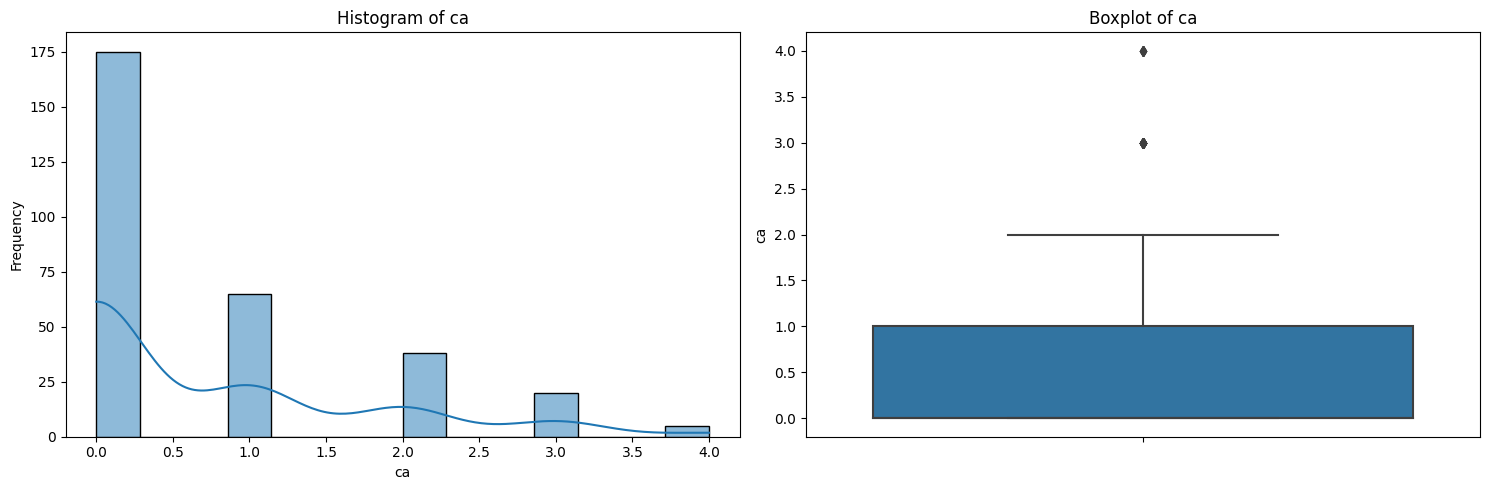

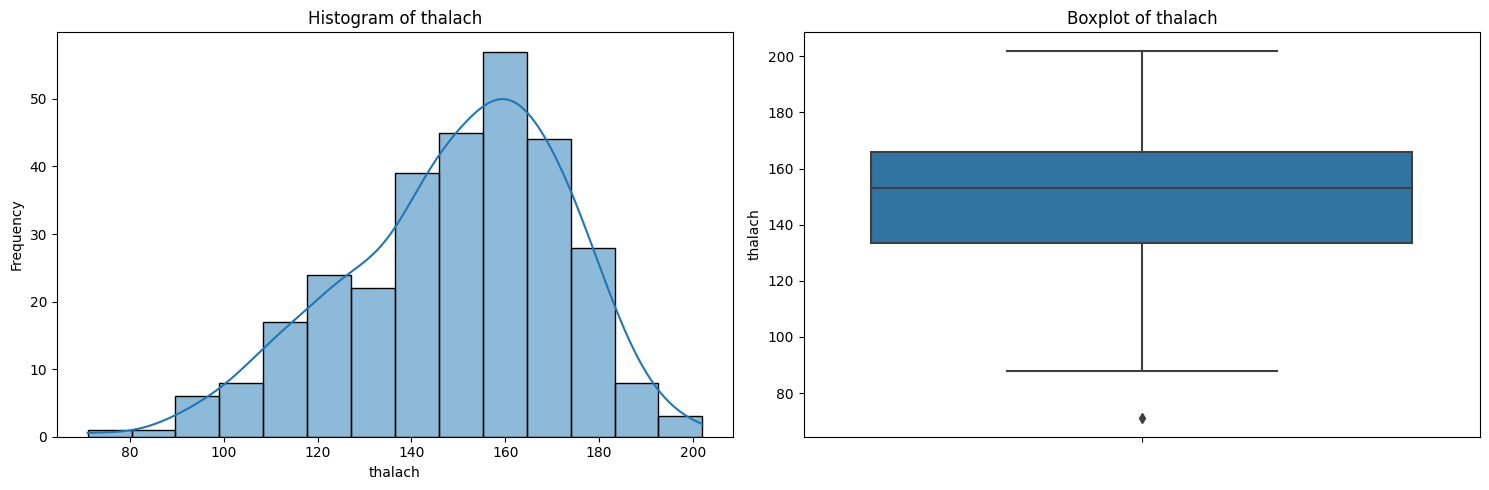

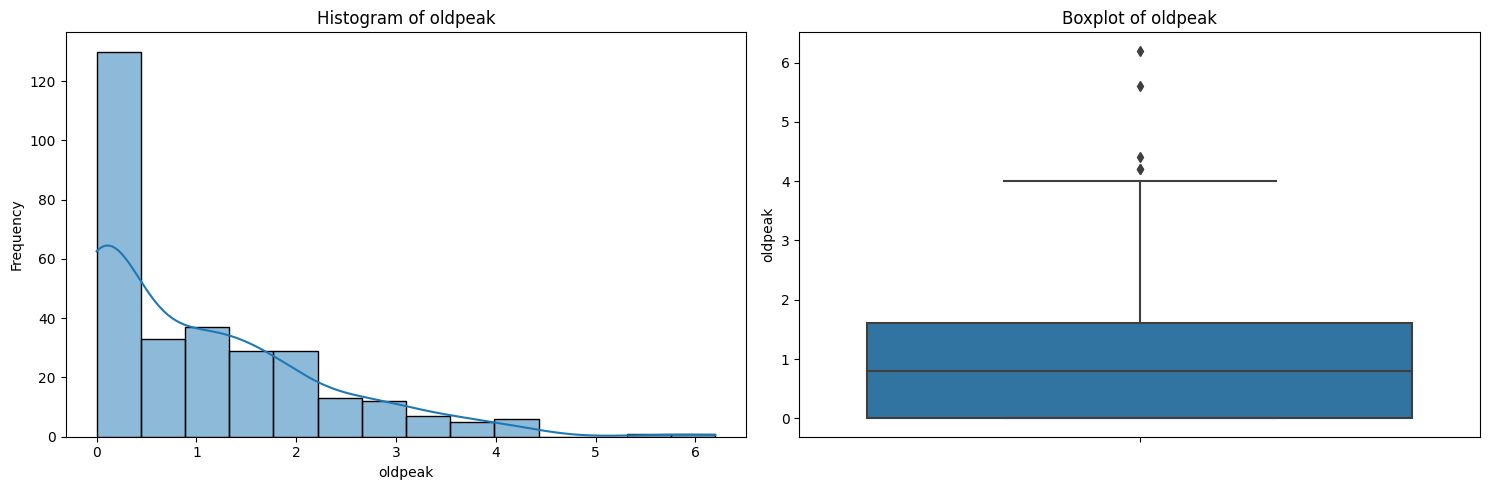

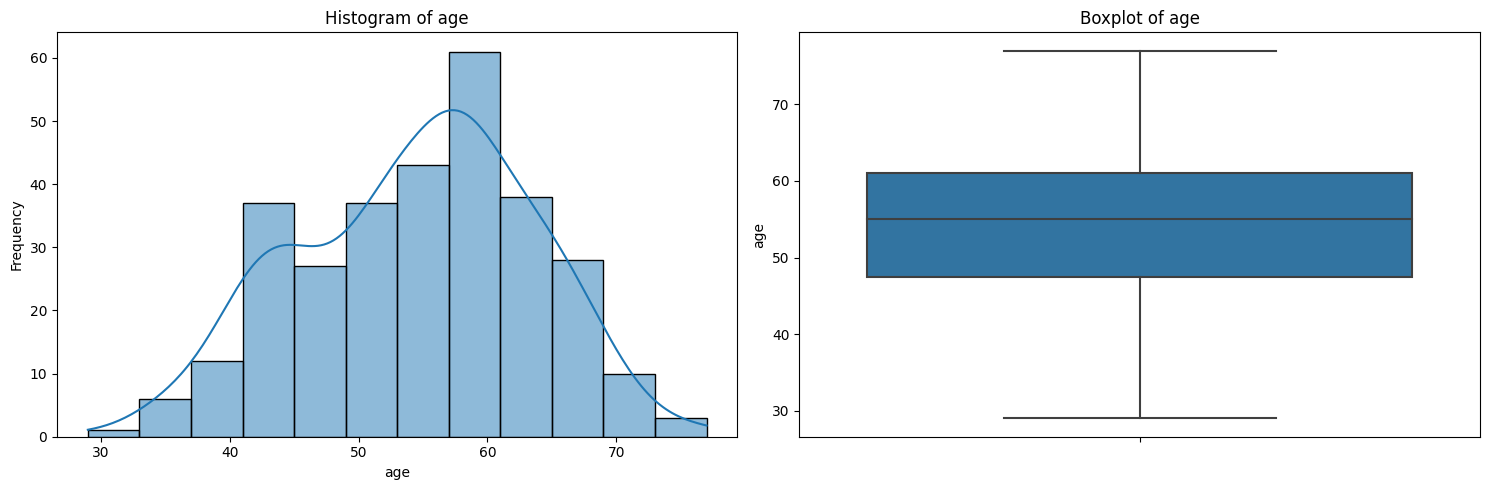

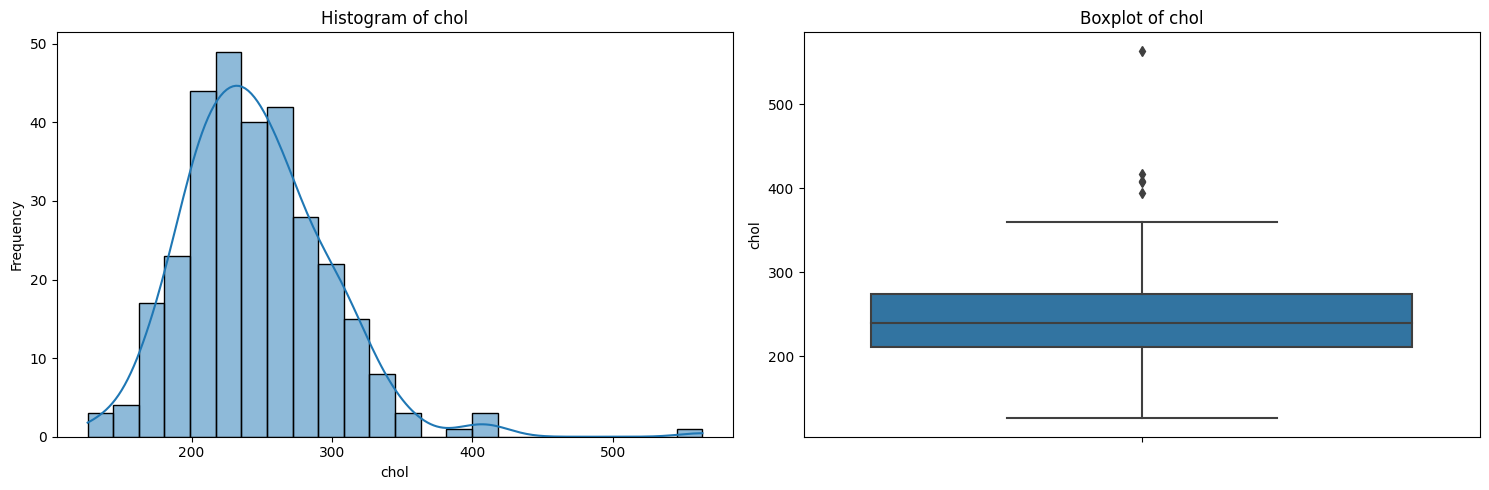

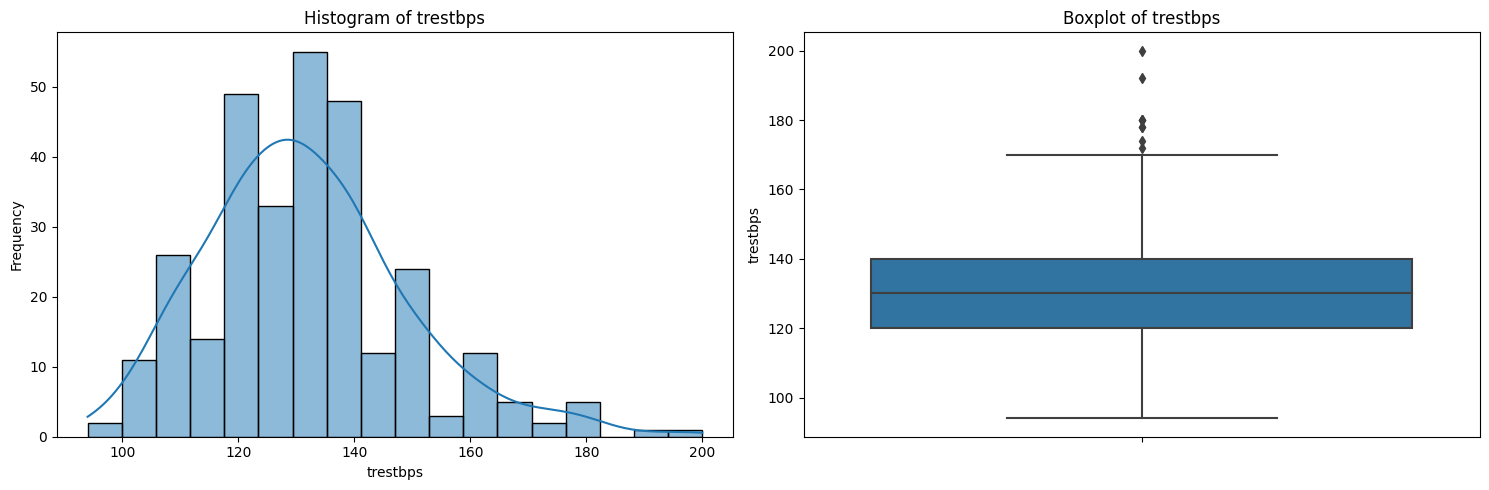

In [41]:
# plotting refined numwerical features

for x in num_features_refine:
    plot_hist_and_box(df_heart,x)